In [1]:
# pip install xlrd

In [2]:
import os

import pandas as pd

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'Bike Related Purchases Past 3 Years.png',
 'customer_address.csv',
 'customer_demographic.csv',
 'New Customers by Birth Year.png',
 'New Customers by Wealth by Birth Year.png',
 'new_customer_list',
 'new_customer_list.csv',
 'Property Values.png',
 'Sprocket Central Analysis - KPMG Virtual Internship.ipynb',
 'Sprocket Central Data - KPMG.xlsx',
 'transactions.csv']

In [5]:
transactions=pd.read_excel('Sprocket Central Data - KPMG.xlsx',sheet_name='Transactions',skiprows=1)
transactions.to_csv('transactions.csv')

In [6]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [7]:
transactions.groupby('customer_id')

In [8]:
transactions.shape

(20000, 13)

In [9]:
transactions.count()

transaction_id             20000
product_id                 20000
customer_id                20000
transaction_date           20000
online_order               19640
order_status               20000
brand                      19803
product_line               19803
product_class              19803
product_size               19803
list_price                 20000
standard_cost              19803
product_first_sold_date    19803
dtype: int64

In [10]:
transactions.count().sum() / (transactions.shape[0] * transactions.shape[1])

0.9940692307692308

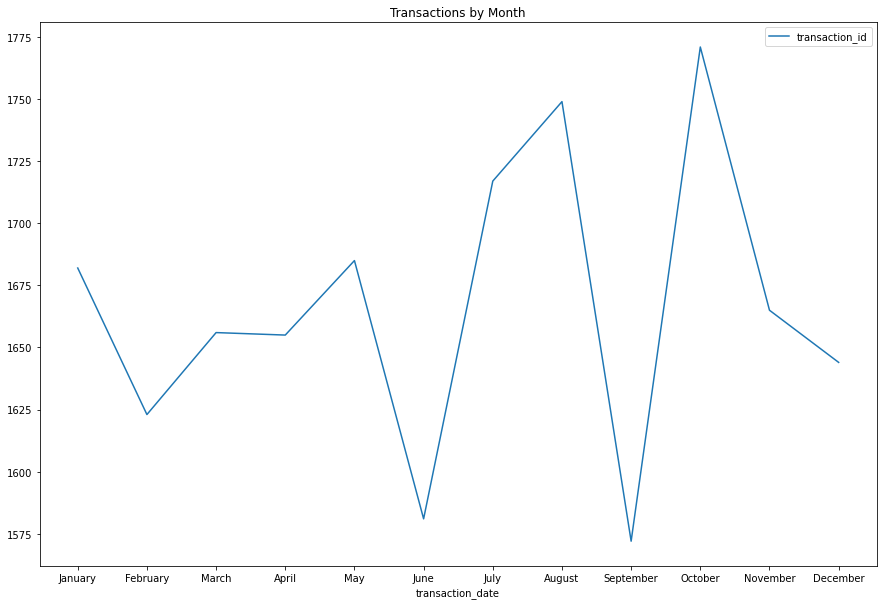

In [74]:
monthly_transactions=transactions.set_index('transaction_date')['transaction_id'].resample('M').nunique()
monthly_transactions.index=monthly_transactions.index.strftime('%B')
monthly_transactions=pd.DataFrame(monthly_transactions)
monthly_transactions_plot=monthly_transactions.plot(xticks=range(len(monthly_transactions)),figsize=(15,10)).set_title('Transactions by Month');

In [75]:
monthly_transactions_plot.figure.savefig('Transactions by Month.png')

In [12]:
transactions_value_counts=[pd.DataFrame(transactions[transactions.columns[i]].value_counts()).T for i in range(len(transactions.columns))]
transactions_value_counts

[                2047   10912  12947  2708   661    6806   4759   19100  17053  \
 transaction_id      1      1      1      1      1      1      1      1      1   
 
                 8865   ...  9518   11567  17714  19763  5432   7481   1338   \
 transaction_id      1  ...      1      1      1      1      1      1      1   
 
                 3387   13628  2049   
 transaction_id      1      1      1  
 
 [1 rows x 20000 columns],
              0    3    1    35   38   4    2    90   12   80   ...  97   24   \
 product_id  1378  354  311  268  267  241  240  225  224  223  ...  142  141   
 
             73   44   75   71   8    16   100  47   
 product_id  139  138  138  137  136  136  130  121  
 
 [1 rows x 101 columns],
              2183  1068  2476  2072  1672  1302  3232  2464  637   2912  ...  \
 customer_id    14    14    14    13    13    13    13    13    13    13  ...   
 
              3428  1448  3179  287   1757  2395  1569  1203  2271  1544  
 customer_id     1     1   

In [13]:
monthly_transactions.T

transaction_date,January,February,March,April,May,June,July,August,September,October,November,December
transaction_id,1682,1623,1656,1655,1685,1581,1717,1749,1572,1771,1665,1644


In [14]:
new_customer_list=pd.read_excel('Sprocket Central Data - KPMG.xlsx',sheet_name='NewCustomerList',skiprows=1).reset_index()
new_customer_list.to_csv('new_customer_list.csv') # Remove extra column created
new_customer_list.head()

,index,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [15]:
transactions.loc[transactions['product_id']==0]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
34,35,0,2171,2017-08-20,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0
39,40,0,2448,2017-11-28,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0
54,55,0,3140,2017-09-18,0.0,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
60,61,0,1839,2017-02-24,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,34244.0
63,64,0,2000,2017-07-08,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,39031.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19921,19922,0,1869,2017-01-06,1.0,Approved,Norco Bicycles,Road,medium,medium,543.39,407.54,37698.0
19941,19942,0,966,2017-07-30,1.0,Approved,OHM Cycles,Standard,low,medium,71.16,56.93,38647.0
19967,19968,0,2751,2017-04-06,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
19987,19988,0,13,2017-04-05,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,42105.0


In [16]:
new_customer_list.shape

(1000, 24)

In [17]:
new_customer_list.count()

index                                  1000
first_name                             1000
last_name                               971
gender                                 1000
past_3_years_bike_related_purchases    1000
DOB                                     983
job_title                               894
job_industry_category                   835
wealth_segment                         1000
deceased_indicator                     1000
owns_car                               1000
tenure                                 1000
address                                1000
postcode                               1000
state                                  1000
country                                1000
property_valuation                     1000
Unnamed: 16                            1000
Unnamed: 17                            1000
Unnamed: 18                            1000
Unnamed: 19                            1000
Unnamed: 20                            1000
Rank                            

In [18]:
new_customer_list['DOB'].count() / len(new_customer_list)

0.983

In [19]:
new_customer_list_complete_rows_count=len(new_customer_list.columns[new_customer_list.count() == new_customer_list.shape[0]])

In [20]:
new_customer_list_complete_rows_count / len(new_customer_list.count())

0.8333333333333334

In [21]:
new_customer_list[new_customer_list.duplicated(['first_name','last_name'])]

,index,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value


In [22]:
# Checking duplicated first names by last names to find potential duplicates
# new_customer_list[new_customer_list.duplicated(['first_name'])].sort_values('last_name')

In [23]:
new_customer_list.count().sum()

23683

In [24]:
(len(new_customer_list.columns) * len(new_customer_list))

24000

In [25]:
new_customer_list.count().sum() / (len(new_customer_list.columns) * len(new_customer_list))

0.9867916666666666

In [26]:
print('Percentage of rows missing key data:',165/len(new_customer_list))
# For the missing date of births, we can group by wealth_segment and insert those averages accordingly

Percentage of rows missing key data: 0.165


In [27]:
new_customer_list.describe()

,index,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,49.836000,11.388000,3019.227000,7.397000,0.747340,0.839005,0.942673,0.870514,498.819000,498.819000,0.881714
std,288.819436,27.796686,5.037145,848.895767,2.758804,0.205082,0.248858,0.294832,0.280891,288.810997,288.810997,0.293525
min,0.000000,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,249.750000,26.750000,7.000000,2209.000000,6.000000,0.570000,0.637500,0.712500,0.658750,250.000000,250.000000,0.649531
50%,499.500000,51.000000,11.000000,2800.000000,8.000000,0.750000,0.820000,0.912500,0.842625,500.000000,500.000000,0.860000
75%,749.250000,72.000000,15.000000,3845.500000,9.000000,0.920000,1.031875,1.142969,1.062500,750.250000,750.250000,1.075000
max,999.000000,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [28]:
new_customer_list.columns

Index(['index', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

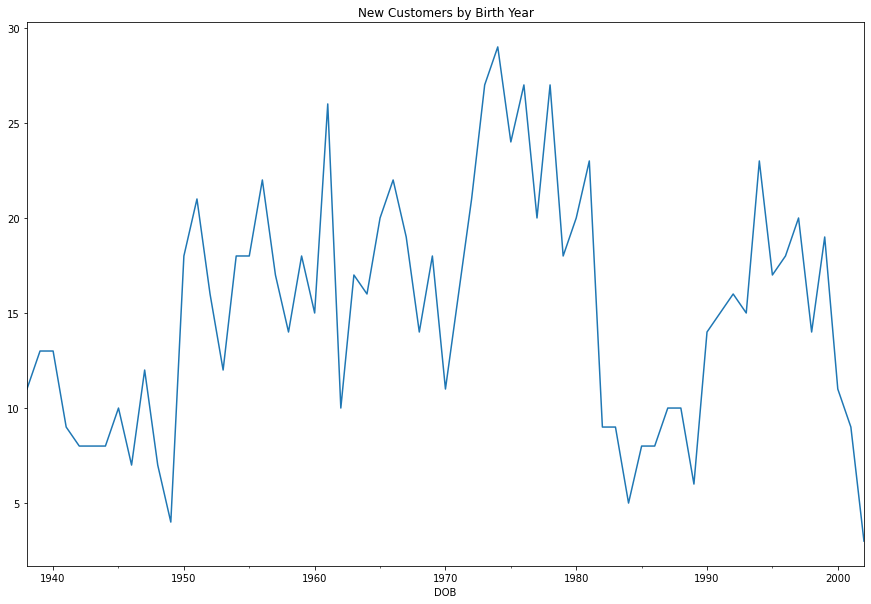

In [29]:
new_customer_by_year=new_customer_list.set_index('DOB')['index'].resample('Y').nunique()
new_customer_by_year_plot=new_customer_by_year.plot(figsize=(15,10)).set_title('New Customers by Birth Year')
new_customer_by_year_plot;

In [30]:
new_customer_by_year_plot.figure.savefig('New Customers by Birth Year.png')

In [31]:
new_customer_by_year

DOB
1938-12-31    11
1939-12-31    13
1940-12-31    13
1941-12-31     9
1942-12-31     8
              ..
1998-12-31    14
1999-12-31    19
2000-12-31    11
2001-12-31     9
2002-12-31     3
Name: index, Length: 65, dtype: int64

In [32]:
new_customer_dummies=pd.get_dummies(new_customer_list[['wealth_segment']])
new_customer_list_dummies=pd.concat([new_customer_list['DOB'],new_customer_dummies],axis=1)
new_customer_by_year_by_wealth=new_customer_list_dummies.groupby(new_customer_list_dummies.set_index('DOB').index.year).sum()

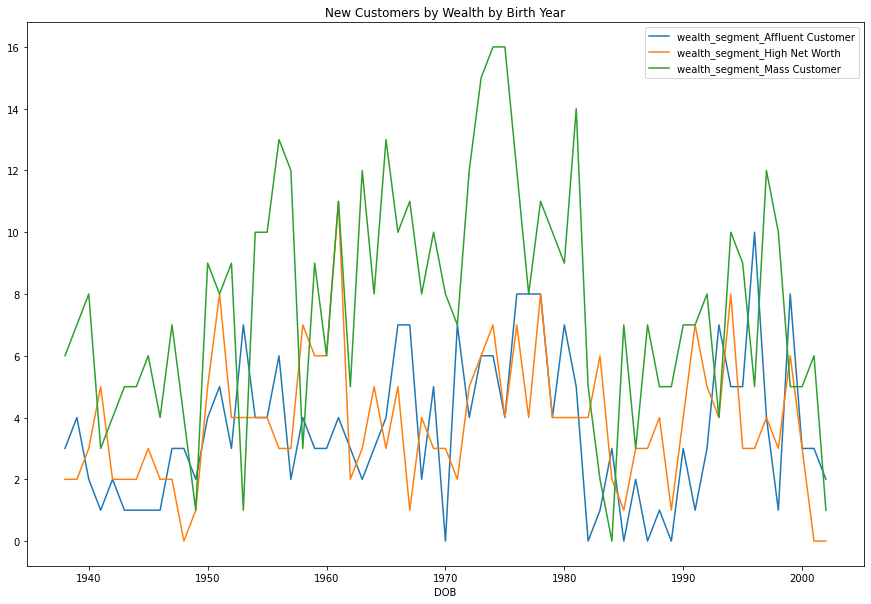

In [33]:
new_customer_by_year_by_wealth_plot=new_customer_by_year_by_wealth.plot(figsize=(15,10)).set_title('New Customers by Wealth by Birth Year')
new_customer_by_year_by_wealth_plot;

In [34]:
new_customer_by_year_by_wealth_plot.figure.savefig('New Customers by Wealth by Birth Year.png')

In [35]:
new_customer_by_year_by_wealth.head()

,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
DOB,,,
1938.0,3,2,6
1939.0,4,2,7
1940.0,2,3,8
1941.0,1,5,3
1942.0,2,2,4


In [36]:
new_customer_value_counts=[pd.DataFrame(new_customer_list[new_customer_list.columns[i]].value_counts()).T for i in range(len(new_customer_list.columns))]
new_customer_value_counts

[       999  328  341  340  339  338  337  336  335  334  ...  666  665  664  \
 index    1    1    1    1    1    1    1    1    1    1  ...    1    1    1   
 
        663  662  661  660  659  658  0    
 index    1    1    1    1    1    1    1  
 
 [1 rows x 1000 columns],
             Rozamond  Mandie  Dorian  Jenelle  Nobe  Leticia  Latrena  Ricki  \
 first_name         3       3       3        2     2        2        2      2   
 
             Bartram  Maddalena  ...  Dennis  Kata  Estevan  Cristie  Andrea  \
 first_name        2          2  ...       1     1        1        1       1   
 
             Rowan  Dahlia  Reynold  Solomon  Garik  
 first_name      1       1        1        1      1  
 
 [1 rows x 940 columns],
            Borsi  Sissel  Sturch  Crellim  Eade  Van den Velde  Burgoine  \
 last_name      2       2       2        2     2              2         2   
 
            Minshall  Hallt  Shoesmith  ...  Berney  Leete  Swallwell  Bointon  \
 last_name         2   

In [37]:
customer_demographic=pd.read_excel('Sprocket Central Data - KPMG.xlsx',sheet_name='CustomerDemographic',skiprows=1)
customer_demographic.to_csv('customer_demographic.csv') # Remove extra column created
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [38]:
customer_demographic.shape

(4000, 13)

In [39]:
customer_demographic.count()

customer_id                            4000
first_name                             4000
last_name                              3875
gender                                 4000
past_3_years_bike_related_purchases    4000
DOB                                    3913
job_title                              3494
job_industry_category                  3344
wealth_segment                         4000
deceased_indicator                     4000
default                                3698
owns_car                               4000
tenure                                 3913
dtype: int64

In [40]:
customer_demographic_complete_rows_count=len(customer_demographic.columns[customer_demographic.count() == customer_demographic.shape[0]])

In [41]:
customer_demographic_complete_rows_count / len(customer_demographic.count())

0.5384615384615384

In [42]:
customer_demographic[customer_demographic.duplicated(['first_name','last_name'])]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1350,1351,Lorettalorna,NaN,U,32,NaT,Office Assistant IV,IT,High Net Worth,N,NaN,No,NaN
1904,1905,Corabelle,NaN,Female,21,1953-09-17,Help Desk Technician,Manufacturing,Affluent Customer,N,00ËÆ$-,No,15.0


In [43]:
customer_demographic.count()

customer_id                            4000
first_name                             4000
last_name                              3875
gender                                 4000
past_3_years_bike_related_purchases    4000
DOB                                    3913
job_title                              3494
job_industry_category                  3344
wealth_segment                         4000
deceased_indicator                     4000
default                                3698
owns_car                               4000
tenure                                 3913
dtype: int64

In [44]:
customer_demographic.count().sum() / (customer_demographic.shape[0] * customer_demographic.shape[1])

0.9660961538461539

In [45]:
# Default has missing values, but it seems to be a irrelevant column either way

In [46]:
customer_demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


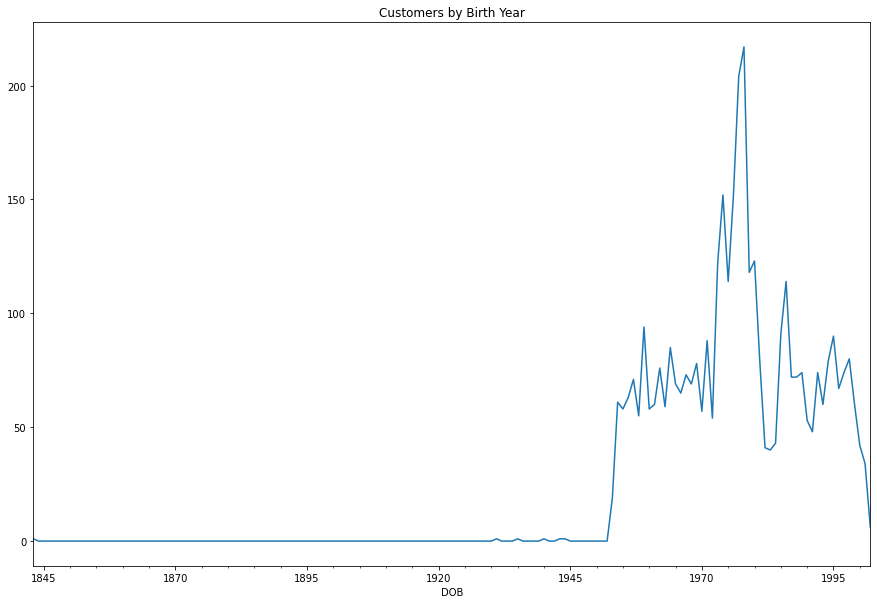

In [47]:
yearly_customer_demographic=customer_demographic.set_index('DOB')['customer_id'].resample('Y').nunique()
yearly_customer_demographic.plot(figsize=(15,10)).set_title('Customers by Birth Year');

In [48]:
# There seems to be an outlier in our customer date range, otherwise the data looks good

In [49]:
customer_demographic['DOB']

0      1953-10-12
1      1980-12-16
2      1954-01-20
3      1961-10-03
4      1977-05-13
          ...    
3995   1975-08-09
3996   2001-07-13
3997          NaT
3998   1973-10-24
3999   1991-11-05
Name: DOB, Length: 4000, dtype: datetime64[ns]

In [50]:
#customer_list_dummies.groupby(customer_list_dummies.set_index('DOB').index.year).sum()

In [51]:
customer_dummies=pd.get_dummies(customer_demographic[['wealth_segment']])
customer_list_dummies=pd.concat([customer_demographic['DOB'],customer_dummies],axis=1).dropna()
customer_by_year_by_wealth=customer_list_dummies.groupby(customer_list_dummies.set_index('DOB').index.year).sum()

In [52]:
customer_by_year_by_wealth.head()

,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
DOB,,,
1843,1,0,0
1931,1,0,0
1935,0,0,1
1940,0,0,1
1943,0,1,0


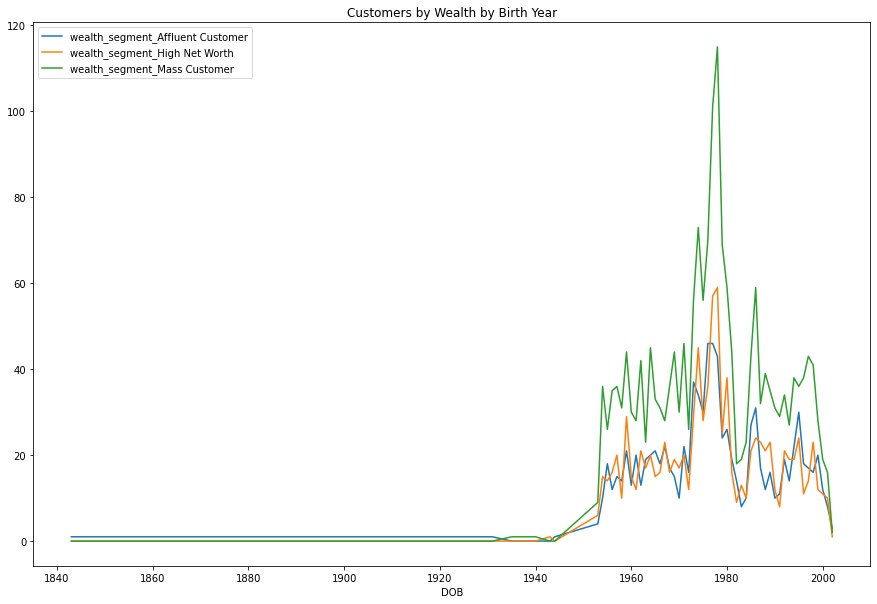

In [53]:
customer_by_year_by_wealth.plot(figsize=(15,10)).set_title('Customers by Wealth by Birth Year');

In [54]:
customer_demographic_value_counts=[pd.DataFrame(customer_demographic[customer_demographic.columns[i]].value_counts()).T for i in range(len(customer_demographic.columns))]
customer_demographic_value_counts

[             2047  657   2732  681   2728  677   2724  673   2720  669   ...  \
 customer_id     1     1     1     1     1     1     1     1     1     1  ...   
 
              1334  3379  1330  3375  1326  3371  1322  3367  1318  2049  
 customer_id     1     1     1     1     1     1     1     1     1     1  
 
 [1 rows x 4000 columns],
             Max  Tobe  Timmie  Osgood  Corabelle  Emlyn  Basile  Lindsay  \
 first_name    5     5       5       4          4      4       4        4   
 
             Hubie  Gerome  ...  Augusta  Quintin  Lucius  Tiphani  Job  \
 first_name      4       4  ...        1        1       1        1    1   
 
             Rosamund  Filippo  Jana  Phil  Elton  
 first_name         1        1     1     1      1  
 
 [1 rows x 3139 columns],
            Pristnor  Ramsdell  Crosse  Cerman  Rounds  Wonfor  Helleckas  \
 last_name         3         3       2       2       2       2          2   
 
            Bernardini  Duke  Tixall  ...  Mortimer  Denys  Se

In [55]:
# 'Gender' column for customer demographics needs to be formatted

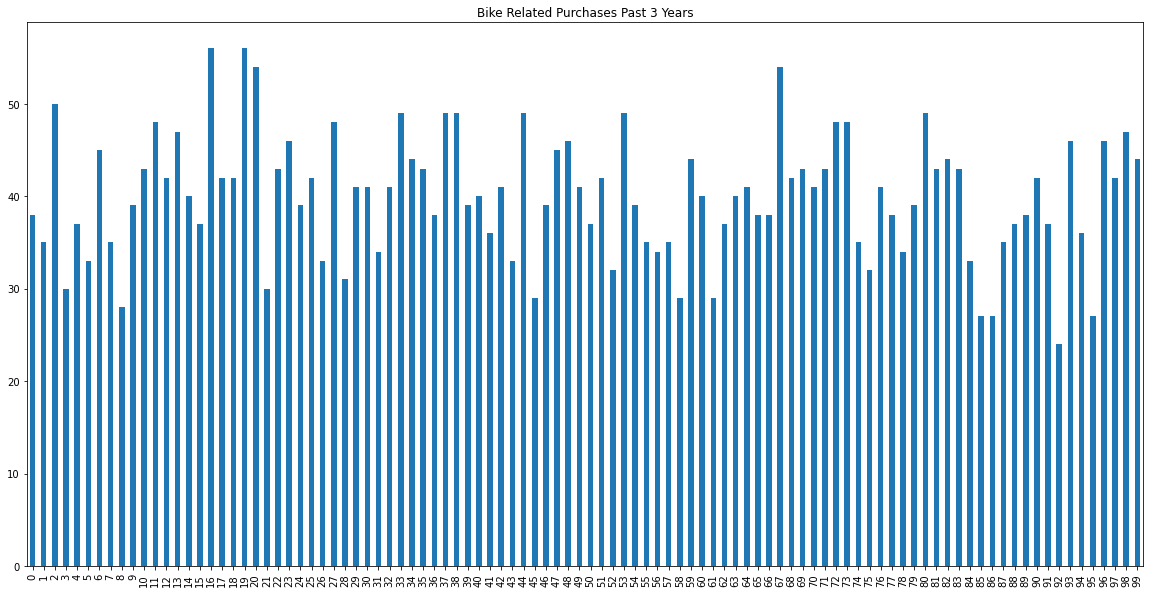

In [56]:
past_3_year_purchases=customer_demographic['past_3_years_bike_related_purchases'].value_counts().sort_index().plot.bar(figsize=(20,10)).set_title('Bike Related Purchases Past 3 Years')
past_3_year_purchases;

In [57]:
past_3_year_purchases.figure.savefig('Bike Related Purchases Past 3 Years.png')

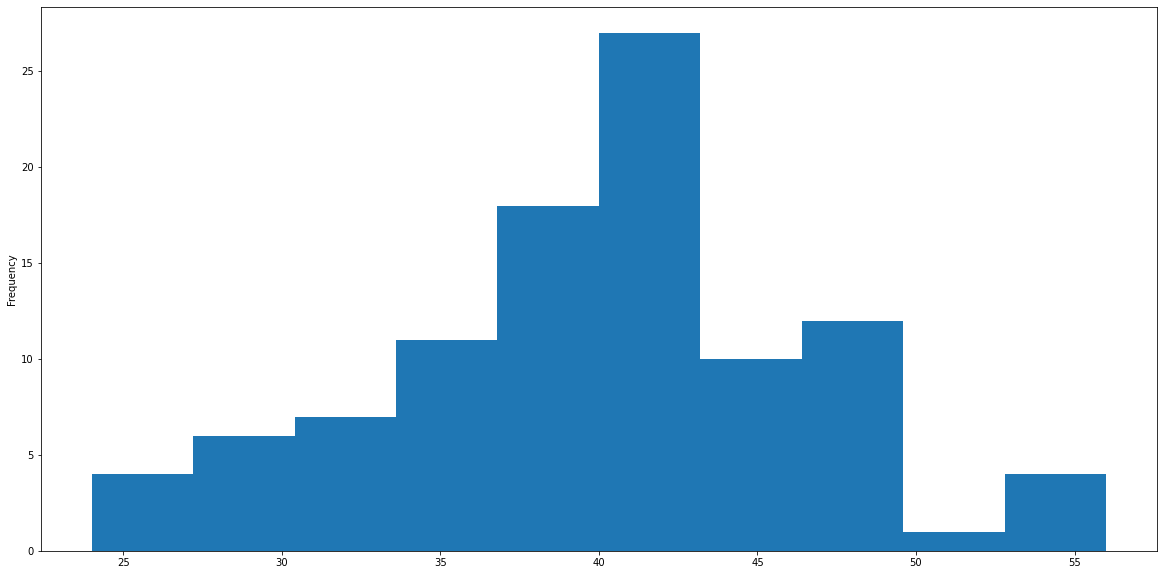

In [58]:
customer_demographic['past_3_years_bike_related_purchases'].value_counts().sort_index().plot.hist(figsize=(20,10));

In [59]:
customer_address=pd.read_excel('Sprocket Central Data - KPMG.xlsx',sheet_name='CustomerAddress',skiprows=1)
customer_address.to_csv('customer_address.csv') # Remove extra column created
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [60]:
customer_address[customer_address.duplicated(['address'])]

,customer_id,address,postcode,state,country,property_valuation
2470,2475,3 Talisman Place,4017,QLD,Australia,5
2980,2985,3 Mariners Cove Terrace,2216,NSW,Australia,10
3535,3540,64 Macpherson Junction,4061,QLD,Australia,8


In [61]:
customer_address.shape
# Mismatch between customer demographic (4000) and customer address (3999) means that we will delete the last row in customer demographic to smooth the merge

(3999, 6)

In [62]:
customer_address.count()

customer_id           3999
address               3999
postcode              3999
state                 3999
country               3999
property_valuation    3999
dtype: int64

In [63]:
len(customer_address.all())

6

In [64]:
# Not missing any rows (except for the last one)

In [65]:
customer_address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


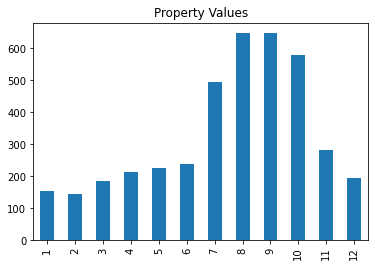

In [66]:
propery_values=customer_address['property_valuation'].value_counts().sort_index().plot.bar().set_title('Property Values')
propery_values;

In [67]:
propery_values.figure.savefig('Property Values.png')

In [68]:
customer_address_value_counts=[pd.DataFrame(customer_address[customer_address.columns[i]].value_counts()).T for i in range(len(customer_address.columns))]
customer_address_value_counts

[             2047  653   2728  677   2724  673   2720  669   2716  665   ...  \
 customer_id     1     1     1     1     1     1     1     1     1     1  ...   
 
              1334  3379  1330  3375  1326  3371  1322  3367  1318  2049  
 customer_id     1     1     1     1     1     1     1     1     1     1  
 
 [1 rows x 3999 columns],
          64 Macpherson Junction  3 Talisman Place  3 Mariners Cove Terrace  \
 address                       2                 2                        2   
 
          03742 Granby Parkway  5468 Moose Lane  274 Ludington Trail  \
 address                     1                1                    1   
 
          087 Fallview Plaza  66 Talmadge Terrace  3525 Buena Vista Plaza  \
 address                   1                    1                       1   
 
          58047 Westport Road  ...  25413 Delaware Pass  48 Cascade Terrace  \
 address                    1  ...                    1                   1   
 
          8766 Onsgard Plaza  1 Schi

In [69]:
# 'Country' needs to be reformatted as well

In [70]:
customer_demographic['customer_id']

0          1
1          2
2          3
3          4
4          5
        ... 
3995    3996
3996    3997
3997    3998
3998    3999
3999    4000
Name: customer_id, Length: 4000, dtype: int64

In [71]:
customer_address['customer_id']

0          1
1          2
2          4
3          5
4          6
        ... 
3994    3999
3995    4000
3996    4001
3997    4002
3998    4003
Name: customer_id, Length: 3999, dtype: int64

In [72]:
transactions['customer_id']

0        2950
1        3120
2         402
3        3135
4         787
         ... 
19995    1018
19996     127
19997    2284
19998    2764
19999    1144
Name: customer_id, Length: 20000, dtype: int64

In [73]:
transactions['customer_id'].sort_values().unique()

array([   1,    2,    3, ..., 3499, 3500, 5034], dtype=int64)